# <center> CNN Transfer Learning Assignment Week  4 </center>

<center> <img width="500px" height="500px" src="https://thedatafrog.com/static/blog/images/2019/10/dessin_transfer_learning_crop-1-1024x794.731011517859.jpg"> </center>

## Assignment Goal 
> "Choose an image classification problem that is well-suited to be solved using transfer learning. Choose a suitable pretrained model, re-use the weights of the convolutional layers, and train the dense layers using a series of input images of your own choice. <br><br>
Hand in your Jupyter notebook which also functions as a research report. You describe the context of the problem at hand, the methods, the results, and your conclusion. To show progress of training, you should create plots of accuracy and loss versus epoch number. For evaluation, you should construct a confusion matrix and discuss your findings. In addition, you can show some example test images that are classified right and some that are classified wrong. This gives an idea of what your network is capable of (in addition to your confusion matrix and other evaluation metrics)."

## Deliverable
Convert your Jupyter notebook to html and deliver the .html file. 

## Problem Description
Training a model costs lots of time and computational power. That's when pre-trained models come at hand. A pre-trained model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task. Especially when it is concerning an image recognition task, pre-trained models are great. Firstly, they are easier to use as they give the architecture "for free". Secondly, they usually have better results. Last but not least, thy require less training power. 

## Assignment Overview
The aim of this exercise is to experiment with Transfer Learning by using a pre-trained model on an image dataset. I have used Google TensorFlow Hub and the MobileNet V2 (https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4).

### Import Libraries

In [2]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
import itertools

In [35]:
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

classifier_model = mobilenet_v2

In [32]:
# Link to the pre-trained model -> https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4
# According to the documentation: https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub
# input size of 224x224 pixels
IMAGE_SHAPE = (224, 224)

# having the model ready
classifier = tf.keras.Sequential ([
    hub.KerasLayer(classifier_model, input_shape = IMAGE_SHAPE+(3,))
]) 
# IMAGE_SHAPE+(3,) to add the third dimension for the channel (224x224x3)

OSError: SavedModel file does not exist at: C:\Users\deyna\AppData\Local\Temp\tfhub_modules\426589ad685896ab7954855255a52db3442cb38d\{saved_model.pbtxt|saved_model.pb}

In [5]:
# download the image labels
tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

'C:\\Users\\deyna\\.keras\\datasets\\ImageNetLabels.txt'

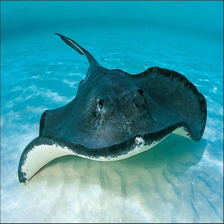

In [6]:
# Try to classify label nr 248 - husky -> https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/

test_img = Image.open('stingray.jpg').resize(IMAGE_SHAPE)
test_img

In [7]:
test_img = np.array(test_img)/255.0
test_img.shape

(224, 224, 3)

In [8]:
# Range between 0 and 1
test_img

array([[[0.1372549 , 0.32156863, 0.29019608],
        [0.12941176, 0.42745098, 0.4745098 ],
        [0.14901961, 0.40392157, 0.4627451 ],
        ...,
        [0.15294118, 0.41176471, 0.4745098 ],
        [0.15686275, 0.42352941, 0.48627451],
        [0.11372549, 0.25490196, 0.33333333]],

       [[0.13333333, 0.48627451, 0.50588235],
        [0.07843137, 0.60392157, 0.69411765],
        [0.07843137, 0.59607843, 0.68627451],
        ...,
        [0.07058824, 0.63137255, 0.71764706],
        [0.09019608, 0.64705882, 0.7254902 ],
        [0.10980392, 0.37254902, 0.43921569]],

       [[0.11764706, 0.45882353, 0.5372549 ],
        [0.02745098, 0.59607843, 0.72941176],
        [0.01176471, 0.60784314, 0.72941176],
        ...,
        [0.01176471, 0.64705882, 0.76862745],
        [0.02745098, 0.6627451 , 0.77254902],
        [0.08235294, 0.40392157, 0.46666667]],

       ...,

       [[0.59215686, 0.65490196, 0.68235294],
        [0.72941176, 0.83921569, 0.88235294],
        [0.7254902 , 0

In [9]:
# For prediction
test_img[np.newaxis, ...].shape

(1, 224, 224, 3)

In [10]:
# total of 1000 classes
result = classifier.predict(test_img[np.newaxis, ...])
result.shape

ValueError: in user code:

    File "C:\Users\deyna\anaconda3\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\deyna\anaconda3\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\deyna\anaconda3\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\deyna\anaconda3\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\Users\deyna\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\deyna\AppData\Local\Temp\__autograph_generated_fileez9r90pc.py", line 74, in tf__call
        ag__.if_stmt(ag__.not_(ag__.ld(self)._has_training_argument), if_body_3, else_body_3, get_state_3, set_state_3, ('result', 'training'), 1)
    File "C:\Users\deyna\AppData\Local\Temp\__autograph_generated_fileez9r90pc.py", line 72, in else_body_3
        result = ag__.converted_call(ag__.ld(smart_cond).smart_cond, (ag__.ld(training), ag__.autograph_artifact((lambda : ag__.converted_call(ag__.ld(f), (), dict(training=True), fscope))), ag__.autograph_artifact((lambda : ag__.converted_call(ag__.ld(f), (), dict(training=False), fscope)))), None, fscope)
    File "C:\Users\deyna\AppData\Local\Temp\__autograph_generated_fileez9r90pc.py", line 72, in <lambda>
        result = ag__.converted_call(ag__.ld(smart_cond).smart_cond, (ag__.ld(training), ag__.autograph_artifact((lambda : ag__.converted_call(ag__.ld(f), (), dict(training=True), fscope))), ag__.autograph_artifact((lambda : ag__.converted_call(ag__.ld(f), (), dict(training=False), fscope)))), None, fscope)

    ValueError: Exception encountered when calling layer "keras_layer" "                 f"(type KerasLayer).
    
    in user code:
    
        File "C:\Users\deyna\anaconda3\lib\site-packages\tensorflow_hub\keras_layer.py", line 237, in call  *
            result = smart_cond.smart_cond(training,
    
        ValueError: Can not squeeze dim[1], expected a dimension of 1, got 3 for '{{node predict/MobilenetV2/Logits/Squeeze}} = Squeeze[T=DT_FLOAT, squeeze_dims=[1, 2]](predict/MobilenetV2/Logits/Conv2d_1c_1x1/BiasAdd)' with input shapes: [?,3,3,1001].
    
    
    Call arguments received by layer "keras_layer" "                 f"(type KerasLayer):
      • inputs=tf.Tensor(shape=(None, 224, 224, 3), dtype=float32)
      • training=False


In [11]:
result

NameError: name 'result' is not defined

In [12]:
# the highest value for the test img 
predict_label_index = np.argmax(result)
predict_label_index

NameError: name 'result' is not defined

In [13]:
# check the first 10 instances of the file with the labels
image_labels = []
with open("./ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:10]

['background',
 'tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen']

In [14]:
# the image is indeed an electic ray fish
image_labels[predict_label_index]

NameError: name 'predict_label_index' is not defined

## Try with a dataset

In [15]:
# loading a flower dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir = '.', untar = True)
data_dir

'.\\datasets\\flower_photos'

In [16]:
# convert the string path to windows path
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [17]:
# recursively go to all the directories and show the first five paths of imgs
list(data_dir.glob('*/*.jpg'))[:6]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg')]

In [18]:
# all images
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [19]:
# get the roses
daisies = list(data_dir.glob('daisy/*'))
daisies[:6]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg')]

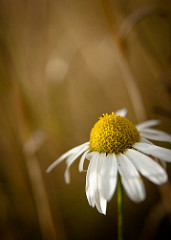

In [20]:
# open a rose img
Image.open(str(daisies[8]))

In [21]:
# A dictionary, where the key is the flower name and the value is the list of images
flower_imgs_dict = {
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')), 
    'roses': list(data_dir.glob('roses/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [22]:
# To prepare the data for the ML model, it needs to be converted with 0's and 1's, so I'll pass labels to the flower folders
flower_lbl_dict = {
    'daisy': 0,
    'dandelion': 1,
    'roses': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [23]:
flower_imgs_dict['daisy'][:7]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg')]

In [24]:
img = cv2.imread(str(flower_imgs_dict['daisy'][0]))
img.shape

(263, 320, 3)

In [25]:
cv2.resize(img, IMAGE_SHAPE).shape

(224, 224, 3)

In [26]:
# Go through all the images in the dictionary and resize them
X, y = [], [] 

for flower_name, images in flower_imgs_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        color_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        resized_img = cv2.resize(color_img, IMAGE_SHAPE)
        X.append(resized_img)
        y.append(flower_lbl_dict[flower_name])

In [27]:
# Creates arrays on the whole dataset
X = np.array(X)
y = np.array(y)

### Train, Test, Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

### Preprocessing: Scale the images

In [29]:
# scale the images between 0 and 1
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

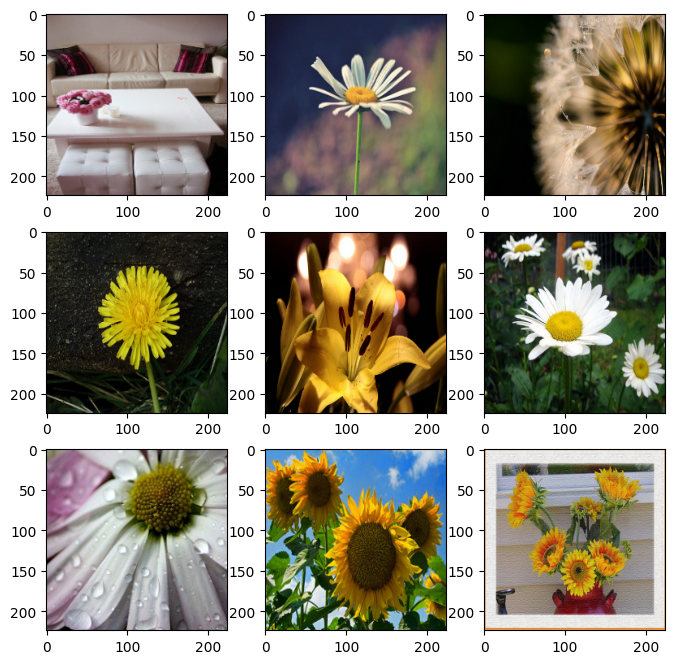

In [30]:
# Show first 9 images 
fig, axes = plt.subplots(3,3, figsize=(8,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(X_train_scaled[i])

In [31]:
# Make prediction using pre-trained model on new flowers dataset
predicted = classifier.predict(np.array(X_train))
predicted = np.argmax(predicted, axis=1)
predicted

ValueError: in user code:

    File "C:\Users\deyna\anaconda3\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\deyna\anaconda3\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\deyna\anaconda3\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\deyna\anaconda3\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\Users\deyna\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\deyna\AppData\Local\Temp\__autograph_generated_fileez9r90pc.py", line 74, in tf__call
        ag__.if_stmt(ag__.not_(ag__.ld(self)._has_training_argument), if_body_3, else_body_3, get_state_3, set_state_3, ('result', 'training'), 1)
    File "C:\Users\deyna\AppData\Local\Temp\__autograph_generated_fileez9r90pc.py", line 72, in else_body_3
        result = ag__.converted_call(ag__.ld(smart_cond).smart_cond, (ag__.ld(training), ag__.autograph_artifact((lambda : ag__.converted_call(ag__.ld(f), (), dict(training=True), fscope))), ag__.autograph_artifact((lambda : ag__.converted_call(ag__.ld(f), (), dict(training=False), fscope)))), None, fscope)
    File "C:\Users\deyna\AppData\Local\Temp\__autograph_generated_fileez9r90pc.py", line 72, in <lambda>
        result = ag__.converted_call(ag__.ld(smart_cond).smart_cond, (ag__.ld(training), ag__.autograph_artifact((lambda : ag__.converted_call(ag__.ld(f), (), dict(training=True), fscope))), ag__.autograph_artifact((lambda : ag__.converted_call(ag__.ld(f), (), dict(training=False), fscope)))), None, fscope)

    ValueError: Exception encountered when calling layer "keras_layer" "                 f"(type KerasLayer).
    
    in user code:
    
        File "C:\Users\deyna\anaconda3\lib\site-packages\tensorflow_hub\keras_layer.py", line 237, in call  *
            result = smart_cond.smart_cond(training,
    
        ValueError: Can not squeeze dim[1], expected a dimension of 1, got 3 for '{{node predict/MobilenetV2/Logits/Squeeze}} = Squeeze[T=DT_FLOAT, squeeze_dims=[1, 2]](predict/MobilenetV2/Logits/Conv2d_1c_1x1/BiasAdd)' with input shapes: [32,3,3,1001].
    
    
    Call arguments received by layer "keras_layer" "                 f"(type KerasLayer):
      • inputs=tf.Tensor(shape=(32, 224, 224, 3), dtype=float32)
      • training=False


In [ ]:
# not a good model, since only daisy is in those 1000 labels
image_labels[795]

### Take pre-trained model and retrain it using flowers images

In [ ]:
# the feature vector gives all the layers except the last one 
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

# trainable false means freeze, do not train (all the layers will have their fixed weights)
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [ ]:
num_of_flowers = 5

# Create the last layer 
model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

history = model.fit(X_train_scaled, y_train, epochs=16, validation_split=0.2)

Due to the not that high performance with only 5 epochs, I increased them from 5 to 16. This led to the model performing better that before. Now it reached 99% accuracy

In [ ]:
model.save('tl_model.h5')

### Results

In [ ]:
model.evaluate(X_test_scaled,y_test)

In [ ]:
model.evaluate(X_train_scaled,y_train)

There isn't a big difference between the training and the testing set, which means the model is good.

In [ ]:
# List all data in history to 
print(history.history.keys())

In [ ]:
#accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train','Test'],loc='upper left')
plt.show()

#Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train','Test'],loc='upper left')
plt.show()

The first plot shows the model's accuracy on the train and the test datasets. It is clearly visible that the accuracy during the second epoch have increased rapidly to 87% from 69%. After that is it obvious that the curve of the test set is not steadily increasing, however, it seems that the model is still learning. At the end of the epochs, the model might be memorizing the training samples, without actually learning something new. Maybe a probable solution would be to perform early stopping, which could potentially stop training the model when it detects that it starts to overfit. 

The second plot is representing the model's loss. Loss value implies how well or poorly a certain model behaves after each iteration of optimization. What I can observe is that the model's loss started dropping in the beginning, then around the 4th epoch it spiked and then it kept an almost steady straight line. This shows that there is an overfitting.

In [ ]:
# Prediction on the retrained model
predict_new = model.predict(np.array(X_train_scaled))
predict_new = np.argmax(predict_new, axis=1)
predict_new

In [ ]:
cm = confusion_matrix(y_true = y_train, y_pred = predict_new)

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

The confusion matrix above, also known as an error matrix, is a summarized table used to assess the performance of a classification model. The number of correct and incorrect predictions are summarized with count values and broken down by each class.

This is a 5x5 matrix. From this we can observe how the model performed.

    - 451 samples were correctly classified(TP) as daisy and 9 were misclassified (FP)
    - 657 samples were correctly classified(TP) as dandelion and 10 were misclassified (FP)
    - 461 samples were correctly classified(TP) as roses and 28 were misclassified (FP)
    - 534 samples were correctly classified(TP) as sunflowers and 15 were misclassified (FP)
    - 572 samples were correctly classified(TP) as tulips and 15 were misclassified (FP)
    
The results of the classification report show that the model performs well. However, I can observe that there are more misclassified samples of roses than the rest. 

### Conclusion

It seems that the model is slightly overfitting even though it shows a pretty good result. A probable solution for fixing this would be to use regualization, add early stopping, so when the model detects that it starts to overfit, it'll stop it,  or to add a learning rate and slow it down a bit. 

In [ ]:
flower_lbl_dict

In [ ]:
# just to check the shape of the y_test
# y_test

In [ ]:
import tensorflow as tf
y_train_one_hot = tf.one_hot(y_train, depth=5)
y_test_one_hot = tf.one_hot(y_test, depth=5)
y_train_one_hot

Visualize the outcome of the model with correctly classified and misclassified images from the dataset.

In [ ]:
import matplotlib.pyplot as plt
size = 224
flower_photos = './datasets/flower_photos'
categories = np.sort(os.listdir(flower_photos))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test_scaled))
        if(categories[np.argmax(y_test_one_hot[k])] == categories[np.argmax(model.predict(X_test_scaled)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test_one_hot[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test_scaled)[k])], color='green')
            ax[i,j].imshow(np.array(X_test_scaled)[k].reshape(size, size, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test_one_hot[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test_scaled)[k])], color='red')
            ax[i,j].imshow(np.array(X_test_scaled)[k].reshape(size, size, 3), cmap='gray')

the above code does not work properly :/

### Final Conclusion

Training a deep learning algorithm is very expensive for the computer, nevertheless, with Transfer Learning the computation time can be reduced. 

In my case: Using the pre-trained model gave at first the accuracy of 69% on the first epoch and increased to 87% in the second epoch. Only with 5 epochs, the accuracy was increased to 93%. On the test dataset, the accuracy is 89%, which is satisfactory for the task.

It is noteworthy to mention that the overall performance of the model is good, however at this point it seems that there is slight overfitting. Above, I mentioned that some measures could be taken to prevent the model from overfitting. However, for the sake of this assignment, the finished work should be satisfactory. 

# XAI Exercise Week 7

In [11]:
import os
os.chdir("tl_model.h5")
model = keras.models.load_model("Desktop\Fontys\Semester 7\Weeks\CNN\tl_model.h5", custom_objects={'KerasLayer':hub.KerasLayer})